In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("test_img.jpg", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.waitKey(0)
cv2.destroyAllWindows()

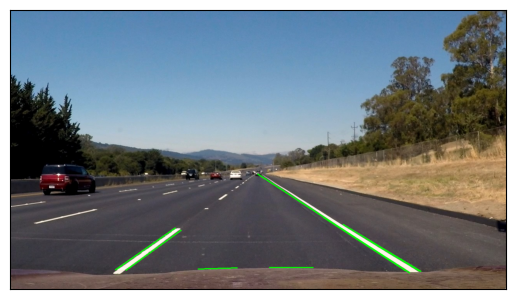

In [4]:
# Step 2) Gray Scale
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray_img = cv2.dilate(gray_img, kernel=np.ones((5, 5), np.uint8))

# Step 3) Canny
canny = cv2.Canny(gray_img, 100, 200)

# Step 4) define ROI Vertices
roi_vertices = [(270, 670), (600, 400), (1127, 712)]

# Step 5) define ROI function
def roi(image, vertices):
    mask = np.zeros_like(image)
    mask_color = 255
    cv2.fillPoly(mask, vertices, mask_color)
    masked_img = cv2.bitwise_and(image, mask)
    return masked_img

# Step 6) ROI Image
roi_image = roi(canny, np.array([roi_vertices], np.int32))

# Step 7) Apply Hough Lines P Method on ROI Image
lines = cv2.HoughLinesP(roi_image, 1, np.pi/180, 100, minLineLength=100, maxLineGap=10)

# Step 8) Draw Hough lines
def draw_lines(image, hough_lines):

    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    return image

final_img = draw_lines(img, lines)  # Result

plt.imshow(final_img)
plt.xticks([])
plt.yticks([])
plt.show()